<figure>
<IMG SRC="../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 6

### Error bounds on coherence estimates

<div style='background:#F0F0F0'>  The 95% confidence intervals for the coherence squared $\gamma^2_{xy}(f)$ between two variables $x(t)$ and $y(t)$ are approximately:
$$ \gamma^2_{xy} \pm \frac{\sqrt{2}\left(1+\gamma^2_{xy}\right)}{\left|\gamma_{xy} \right|\sqrt{n_d}}$$
where $n_d$ is the number of blocks used to calculate the coherence.  

You **may** use `matplotlib.mlab.csd` for the following question, but you had best use it correctly!
</div>

<div style='background:#F0F0F0'>**1** Make an input process $x(t)$ as random Gaussian noise, and the output process the sum of a noise source and a running average of the input: $y(t)=n(t)+\frac{1}{b}\int_{t-b}^t x(t')dt'$ and plot (Zoom so we can see whats going on, and label your plot).  Make sure you generate a large time series.</div> 

In [12]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math as math
%matplotlib nbagg

<IPython.core.display.Javascript object>


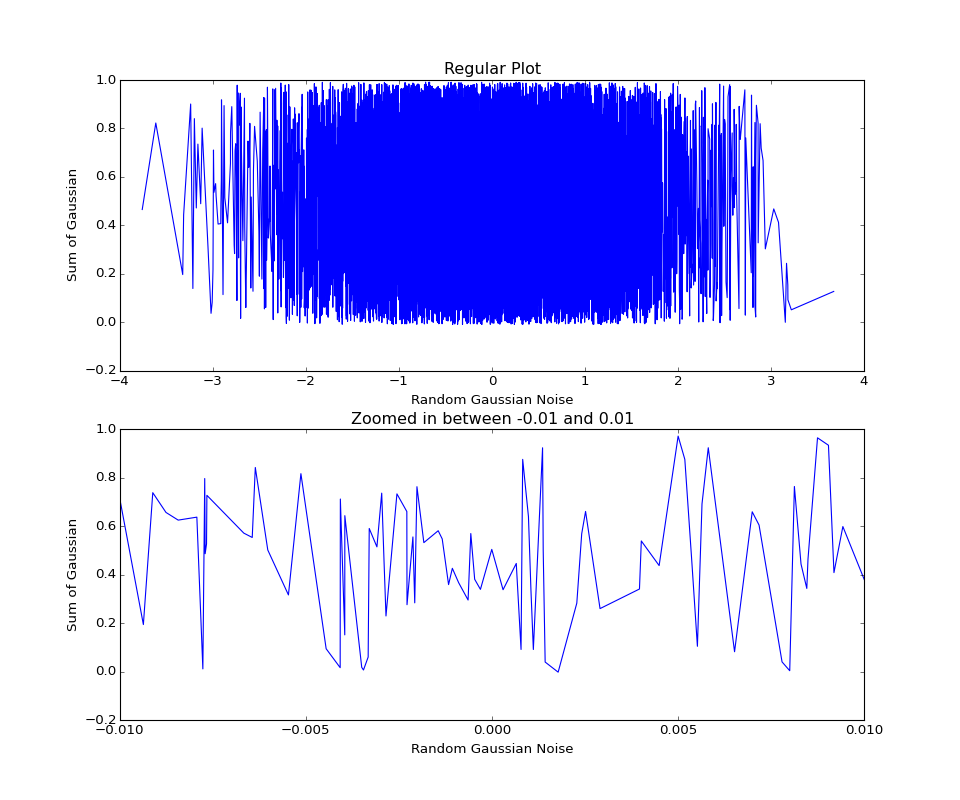

(-0.01, 0.01)

In [2]:
N = 10000
x = random.normal(0.,1.,N)
n = random.rand(N)
x = np.sort(x)
dt = 1.
y = n + (np.convolve(x, np.ones((N,))/N, mode='valid'))

fig,ax=plt.subplots(2,1,figsize=(12,10))
ax[0].plot(x, y)
ax[0].set_xlabel('Random Gaussian Noise')
ax[0].set_ylabel('Sum of Gaussian')
ax[0].set_title('Regular Plot')


ax[1].plot(x, y)
ax[1].set_xlabel('Random Gaussian Noise')
ax[1].set_ylabel('Sum of Gaussian')
ax[1].set_title('Zoomed in between -0.01 and 0.01')
ax[1].set_xlim([-0.01,0.01])

<div style='background:#F0F0F0'>**2** Compute the coherence squared of the input and the output.  Make a plot with the spectra in the upper panel and the coherence squared in the middle panel and the phase in the bottom.

You will need to choose a value for your fft length.  Choose a relative low one to get a smooth plot.
</div>

<IPython.core.display.Javascript object>


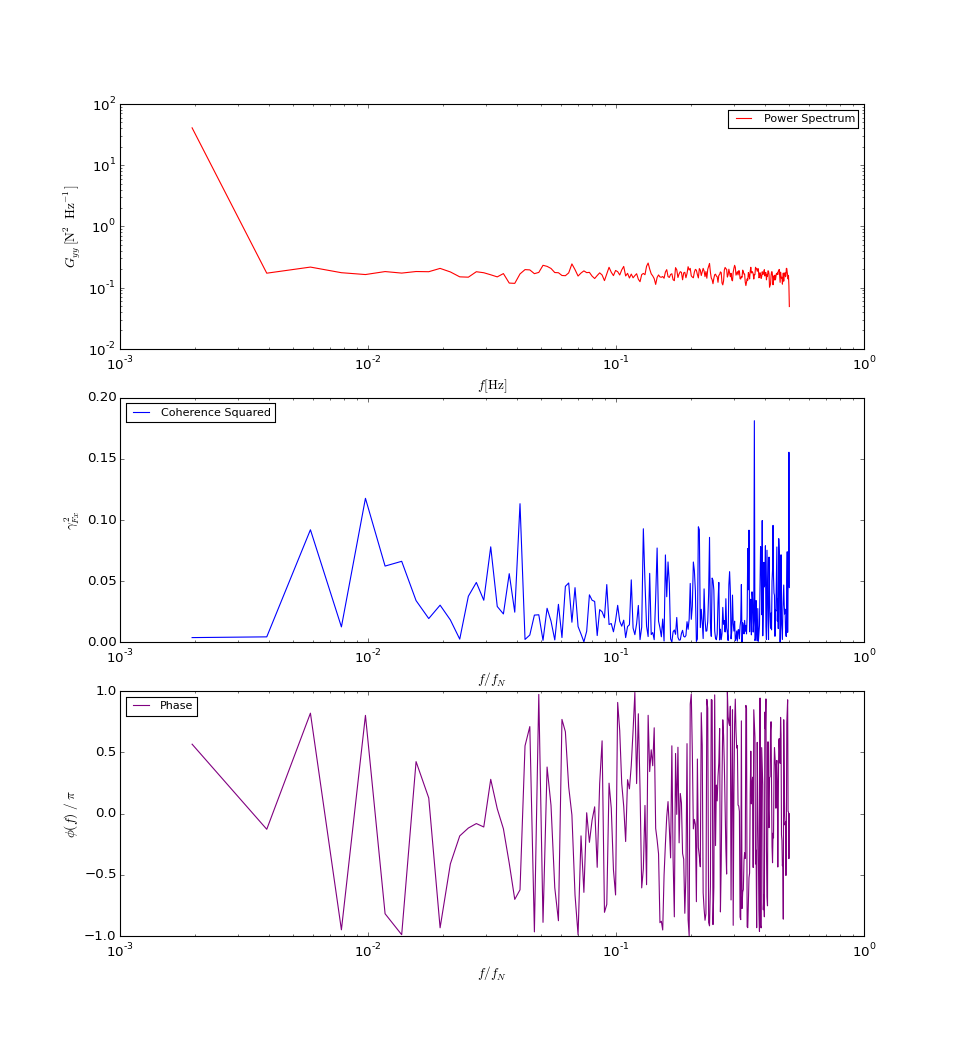

In [3]:
length = 512
cxy,fxy=mlab.csd(x,y,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
py,fy=mlab.psd(y,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
px,fx=mlab.psd(x,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2);
ang = np.arctan2(np.imag(cxy),np.real(cxy))

fig,ax=plt.subplots(3,1,figsize=(12,13))
ax[0].loglog(fy,py,'k',color='red', label='Power Spectrum')
ax[0].set_xlabel(r'$f \mathrm{[Hz]}$')
ax[0].set_ylabel(r'$G_{yy}\ \mathrm{[N^2\ Hz^{-1}]}$');
ax[0].legend(loc='best',fontsize='small')

ax[1].semilogx(fxy,abs(cxy)**2/px/py,'k',color='blue', label='Coherence Squared')
ax[1].set_ylim([0.,0.2])
ax[1].set_ylabel('$\gamma^2_{Fx}$')
ax[1].set_xlabel('$f/f_N$')
ax[1].legend(loc='best',fontsize='small')

ax[2].semilogx(fxy,ang/np.pi,'k',color='purple',label='Phase')
ax[2].set_xlabel('$f/f_N$')
ax[2].set_ylabel('$\phi(f)\ /\ \pi$');
ax[2].legend(loc='best',fontsize='small')

COMMENT HERE: 
YOUR ANSWER HERE

<div style='background:#F0F0F0'>**3** Now repeat the above for three different values of NFFT, each 5 times as large as the next.  Plot the resulting coherence squared functions in separate panels.  Add the confidence intervals to your plot and comment on which peaks are significant.
</div>

<IPython.core.display.Javascript object>


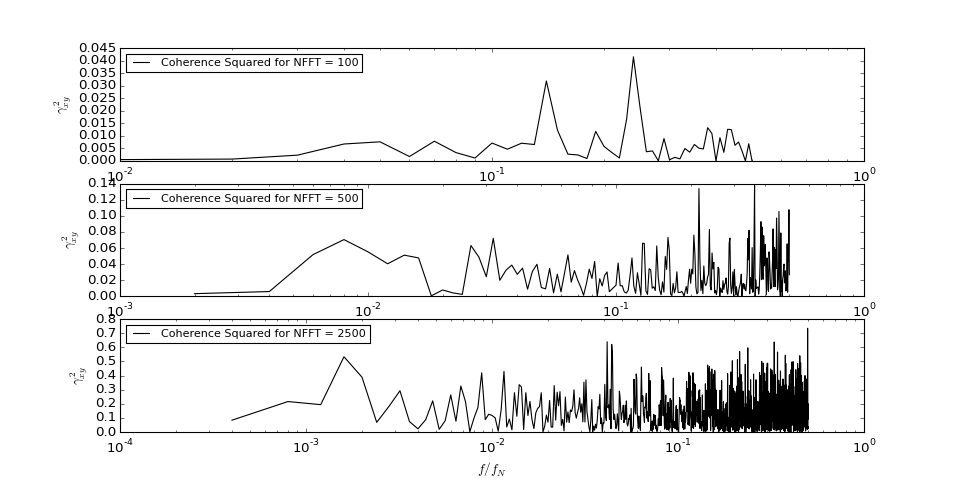

In [35]:
def graphs(x,y,p,N,locate):
    nn = float(N/p)
    cxy,fxy=mlab.csd(x,y,NFFT=p,Fs=1./dt,window=mlab.window_hanning,noverlap=p/2)
    py,fy=mlab.psd(y,NFFT=p,Fs=1./dt,window=mlab.window_hanning,noverlap=p/2)
    px,fx=mlab.psd(x,NFFT=p,Fs=1./dt,window=mlab.window_hanning,noverlap=p/2);
    co = abs(cxy)**2/px/py
    sqrtco = np.sqrt(co)
    inter = math.sqrt(2.) * (1+co)
    inter = inter/math.sqrt(nn)/sqrtco
    ax[locate].semilogx(fxy,co,'k', label='Coherence Squared for NFFT = %i' %p)
    ax[locate].set_ylabel('$\gamma^2_{xy}$')
    ax[locate].set_xlabel('$f/f_N$')
    ax[locate].legend(loc='best',fontsize='small')


fig,ax=plt.subplots(3,1,figsize=(12,6))
graphs(x,y,100,N,0)
graphs(x,y,500,N,1)
graphs(x,y,2500,N,2)

COMMENT HERE

## Q2: Shear turbulence data

In [13]:
time = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/time.txt')
ac = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/ac.txt')
shear = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/s.txt')

<div style='background:#F0F0F0'>Download the data abaove. `time` is a measurement time in seconds. `shear` is a little less than 300 s of data from a turbulence shear probe. Units are $s^{-1}$. `ac` is a suitably scaled acceleration of the vehicle containing the shear probes.

**1** Plot the shear time series and the accelerometer time series.  Comment on any similarities and differences.  Comment on the stationarity of the time series.


<div style='background:#F0F0F0'>Download the data abaove. `time` is a measurement time in seconds. `shear` is a little less than 300 s of data from a turbulence shear probe. Units are $s^{-1}$. `ac` is a suitably scaled acceleration of the vehicle containing the shear probes.

**1** Plot the shear time series and the accelerometer time series.  Comment on any similarities and differences.  Comment on the stationarity of the time series.

<IPython.core.display.Javascript object>


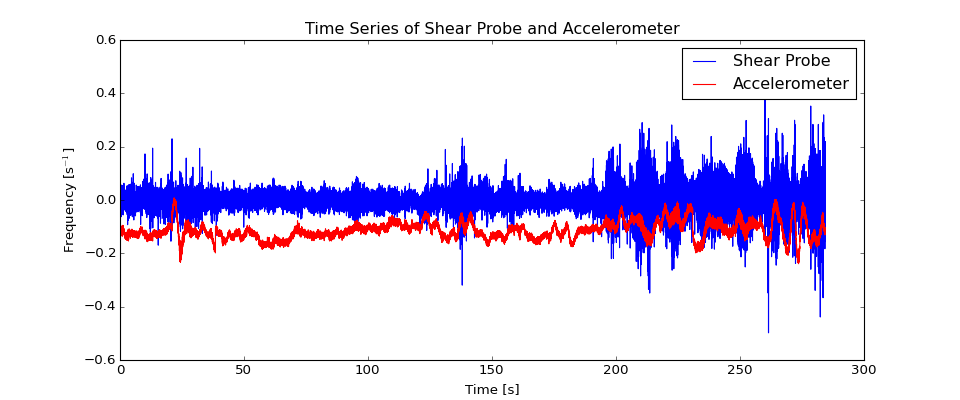

In [22]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(time,shear, label='Shear Probe')
ax.plot(time,ac, label='Accelerometer',color='red')
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'Frequency [s$^{-1}$]')
ax.set_title('Time Series of Shear Probe and Accelerometer')
ax.legend()

COMMENT HERE

<div style='background:#F0F0F0'> **2** Compute the power spectra of the two signals and the coherence squared (you could do the phase too, but it is not too thrilling).  Comment on the spectral similarities and the coherence.  

<IPython.core.display.Javascript object>


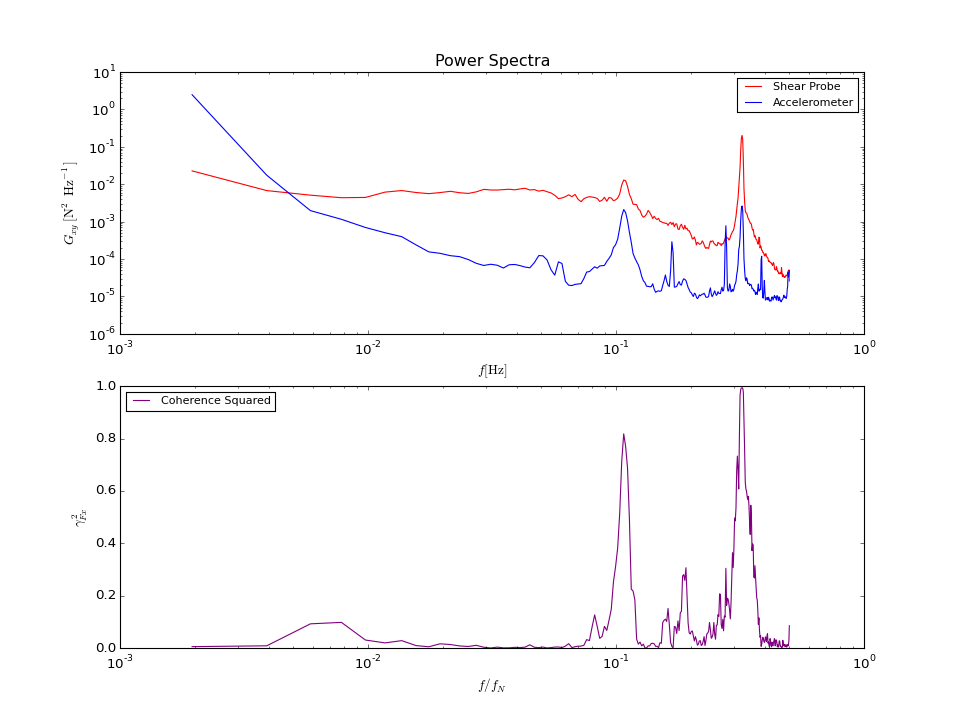

In [36]:
cxy,fxy=mlab.csd(shear,ac,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
py,fy=mlab.psd(ac,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2)
px,fx=mlab.psd(shear,NFFT=length,Fs=1./dt,window=mlab.window_hanning,noverlap=length/2);

#ac = py, shear = px

fig,ax=plt.subplots(2,1,figsize=(12,9))
ax[0].loglog(fx,px,'k',color='red', label='Shear Probe')
ax[0].loglog(fy,py,'k',color='blue', label='Accelerometer')
ax[0].set_xlabel(r'$f \mathrm{[Hz]}$')
ax[0].set_ylabel(r'$G_{xy}\ \mathrm{[N^2\ Hz^{-1}]}$');
ax[0].legend(loc='best',fontsize='small')
ax[0].set_title('Power Spectra')

ax[1].semilogx(fxy,abs(cxy)**2/px/py,'k',color='purple', label='Coherence Squared')
ax[1].set_ylabel('$\gamma^2_{Fx}$')
ax[1].set_xlabel('$f/f_N$')
ax[1].legend(loc='best',fontsize='small')

COMMENT HERE

<div style='background:#F0F0F0'> **3** Compute a spectra that has the contamination from the vibration removed. Comment on how well your correction worked.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

<div style='background:#F0F0F0'>**4** Chose two separate periods of the time series, one that is "turbulent" and one that is "quiet", and plot the raw and corrected shear spectra.  Comment on the differences and the effect of the correction on each spectral estimate.    

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

COMMENT HERE